## Compute performance metrics for the given data 5_a.csv

  Note 1: in this data you can see number of positive points >> number of negatives points

  Note 3: you need to derive the class labels from given score

  $$y^{pred}= \text{[0 if y_score < 0.5 else 1]}$$


 - Compute Confusion Matrix

 - Compute F1 Score

 - Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use

 numpy.trapz(tpr_array, fpr_array)

 https://stackoverflow.com/q/53603376/4084039

 https://stackoverflow.com/a/39678975/4084039

 Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)

- Compute Accuracy Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# df_5_a = pd.read_csv('../Instructions-AML/5_a.csv')
df_5_a = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_a.csv')
print(df_5_a.shape)
df_5_a.head()

(2, 1)


,version https://git-lfs.github.com/spec/v1
0,oid sha256:7d00a79099b5adc45577d5d9b91306c38d0...
1,size 241203


In [2]:
df_5_a['y_predicted'] = np.where(df_5_a['proba'] >= 0.5, float(1), float(0))
df_5_a.head()


KeyError: 'proba'

In [ ]:
# Checking to see if there's any 'proba' less than or equal to 0.5
# And there is none. So all y_predicted will be classified as 1
# df = df_5_a.loc[df_5_a['proba'] <= 0.5 ]
# df.head()

In [ ]:
# print(df_5_a.to_numpy())
actual_y_train_arr = df_5_a.iloc[:, 0].values
print('actual_y_train_arr ', actual_y_train_arr)
predicted_y_arr = df_5_a.iloc[:, 2].values
print('predicted_y_arr ', predicted_y_arr)

actual_y_train_arr  [1. 1. 1. ... 1. 1. 1.]
predicted_y_arr  [1. 1. 1. ... 1. 1. 1.]


#### In below implementation, for a binary class-label (1 and 0 ) I will have 'true-nagative' at the top left of the final confusion matrix, as the traversing of the unique_classes array will start from 0

![img](https://i.imgur.com/MvapmPv.png[/img])

In [ ]:

def calculate_confusion_matrix(true_y_classes_array, predicted_y_classes_array):

  # extract all unique classes from the train y class
  unique_classes = np.unique(true_y_classes_array)
  # print('unique', unique_classes)

  # initialize a matrix with zero values that will be the final confusion matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
      confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[i]) & (predicted_y_classes_array == unique_classes[j]))

  return confusion_matrix

# actual_y_class_list = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
# predicted_y_class_list = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

# Only binary class dataset
actual_y_class_list = [1, 1, 1, 0, 0]
predicted_y_class_list =   [1, 1, 1, 0, 1]

print(calculate_confusion_matrix(actual_y_class_list, predicted_y_class_list))

[[1. 1.]
 [0. 3.]]


## Explanations on the above calculate_confusion_matrix() funcion

[In above implementation, for a binary class-label (1 and 0 ) I will have 'true-nagative' at the top left of the final confusion matrix, as the traversing of the unique_classes array will start from 0 ]

#### 1.np.zeros()  - the first arg of np.zeros() is the shape which is a tuple of ints or simple int

e.g., (2, 3) or 2.

---

#### 2. Now for each row, I need to compare the values between true_y_classes_array and predicted_y_classes_array

So, I will implement this by comparing each element from true_y_classes_array with each of the unique array's elements and then the same for  predicted_y_classes_array

It will give me a list of True / False. Lets see this example

```python
arr1 = [1, 1, 2, 6, 4]
arr2 = np.unique(arr1) # [1 2 4 6]

print("comparing ",  arr1 == arr2[0])
# comparing [ True  True False False False]
```

That is, the above will compare the whole of arr1 with arr2[0] which is 1

---

#### 3. An now use np.sum() to count number of True value

```python
print('np.sum of above True False numpy array ', np.sum(arr1 == arr2[0]))

# np.sum of above True False numpy array  2
```

Note that above kind of operation will only work with `np.unique()` which returns a numpy array, and will not work with plain python list

---

### 4. So now for the confusion matrix, I need to fill up with matching counts of

#### Note `unique_classes[0]` is 1 and `unique_classes[1]` = 0

### For first row of my final confusion_matrix

confusion_matrix[0,0] => i.e. i, j = 0, 0 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for `confusion_matrix[0, 1]` => i.e. i, j = 0, 1  => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`

#### And for second row of my final confusion_matrix

confusion_matrix[1,0] => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for confusion_matrix[1, 1] => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[1])`

"""

---

### If for a binary class-label I have to place 'true-positive' / TF at the top left of the final confusion matrix

i.e. the top-left will have 1 instead of 0 in the final confusion matrix then only need to reverse the unique_classes variable as below.

In [ ]:
def confusion_matrix_tf_top_left(true_y_classes_array, predicted_y_classes_array):

  # extract all unique classes from the train y class
  unique_classes = np.unique(true_y_classes_array)
  # For a binary class the above will give me [0 1] numpy array
  # so top-left of confusion matrix will start from 0 i.e. 'True Negative'

  # But the challenge here asks that the top left will be 'True Positive'
  # Hence I need to reverse the above numpy array
  unique_classes = unique_classes[::-1]
  # print('reversed unique', unique_classes) # will convert the above array to [1 0]

  # initialize a matrix with zero values that will be the final confusion matrix
  confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))

  for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
          # replace below line
          # confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[i]) & (predicted_y_classes_array == unique_classes[j]))
          # with below
          confusion_matrix[i, j] = np.sum((true_y_classes_array == unique_classes[j]) & (predicted_y_classes_array == unique_classes[i]))

  return confusion_matrix

# actual_y_class_list = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
# predicted_y_class_list = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

actual_y_class_list = [1, 1, 1, 0, 0]
predicted_y_class_list =   [1, 1, 1, 0, 1]

confusion_matrix_tf_top_left = confusion_matrix_tf_top_left(actual_y_class_list, predicted_y_class_list)
print(confusion_matrix_tf_top_left)

true_negative, false_positive, false_negative, true_positive = confusion_matrix_tf_top_left[1][1], confusion_matrix_tf_top_left[0][1], confusion_matrix_tf_top_left[1][0], confusion_matrix_tf_top_left[0][0]

[[3. 1.]
 [0. 1.]]


### Explanations and notes on above Confusion matrix function

![img](https://i.imgur.com/1A3Izpg.png)

#### Note `unique_classes[0]` is 1 and `unique_classes[1]` = 0

### For first row of my final confusion_matrix

`confusion_matrix[0,0]` => i.e. i, j = 0, 0 => will have the Total 'True' count (i.e. `np.sum()`) of following conditions

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[0])`

Similarly for `confusion_matrix[0, 1]` => i.e. i, j = 0, 1 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

#### Change this line from previous implementation (when "True Negative" was at top-left of Confusion Matrix ) -
 `(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`

TO

`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

---

### Now second row

And for second row of my final confusion_matrix

`confusion_matrix[1,0]`  => i.e. i, j = 1, 0 => will have the Total 'True' count (i.e. `np.sum()`)  of following conditions

#### Change this line from previous implementation (when "True Negative" was at top-left of Confusion Matrix ) -
`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[0])`

TO

`(true_y_classes_array == unique_classes[0]) & (predicted_y_classes_array == unique_classes[1])`



Similarly for `confusion_matrix[1, 1]`  => i.e. i, j = 1, 1  => will have the Total 'True' count (i.e. `np.sum()`) of following conditions


`(true_y_classes_array == unique_classes[1]) & (predicted_y_classes_array == unique_classes[1])`

In [ ]:
# sum-all-the-elements-of-the confusion_matrix_tf_top_left
# To check that the total num of elements of the original dataframe matches
# with the counts captured in the confusion matrix
sum_all_elements_of_confusion_matrix = np.concatenate(confusion_matrix_tf_top_left).sum()
print(sum_all_elements_of_confusion_matrix == len(actual_y_class_list))

True


In [ ]:
# Testing my custom confusion_matrix result with scikit-learn
from sklearn.metrics import confusion_matrix
sklearn_confustion_matrix = confusion_matrix(actual_y_class_list, predicted_y_class_list)
print(sklearn_confustion_matrix)

[[1 1]
 [0 3]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(actual_y_class_list, predicted_y_class_list).ravel()
print(tn, fp, fn, tp)
print(true_negative, false_positive, false_negative, true_positive)

1 1 0 3
1.0 1.0 0.0 3.0


### From above we can see the values of the confution Matrix matches between scikit-learn and our custom-implementation



---

## F1 Score

![img](https://i.imgur.com/ZPntYB0.jpg)

![Imgur](https://imgur.com/qy5Fesd.jpg)


In [ ]:
# the below function will work only for
# binary confusion matrix
def get_f1_accuracy(binary_conf_matrix):
    true_negative  = binary_conf_matrix[1][1]
    false_positive = binary_conf_matrix[0][1]
    false_negative = binary_conf_matrix[1][0]
    true_positive = binary_conf_matrix[0][0]

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive/ (true_positive + false_negative)

    f1_score = (2 * (precision * recall)) / (precision + recall )

    sum_all_elements_of_confusion_matrix = np.concatenate(binary_conf_matrix).sum()

    accuracy_score = (true_positive + true_negative)/sum_all_elements_of_confusion_matrix

    return f1_score, accuracy_score


print(get_f1_accuracy(confusion_matrix_tf_top_left))




(0.8571428571428571, 0.8)


### Now verifying the above F1-Score with that of sk-learn


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

sklearn_f1_score = f1_score(actual_y_train_arr, predicted_y_arr)
print(sklearn_f1_score)

sklearn_accuracy_score = accuracy_score(actual_y_train_arr, predicted_y_arr)
print(sklearn_accuracy_score)


0.9950248756218906
0.9900990099009901


### From above we can see the values of1_score, accuracy_score matches between scikit-learn and our custom-implementation


---

## AUC-ROC Score Calculation

The Receiver Operating Characetristic (ROC) curve is a graphical plot that allows us to assess the performance of binary classifiers. With imbalanced datasets, the Area Under the Curve (AUC) score is calculated from ROC and is a very useful metric in imbalanced datasets.

TPR and FPR are defined as follows:

- TPR = True Positives / All Positives
- FPR = False Positives / All negatives

In [ ]:
def get_tpr_fpr(y_actual, y_probabilities, threshold_proba_array):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_probabilities)):
        if y_probabilities[i] >= threshold_proba_array :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1

        if y_probabilities[i] < threshold_proba_array:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    tpr = tp / (tp + fn )
    fpr = fp / (fp + tn)

    return [tpr, fpr]


In [ ]:
unique_probability_thresholds = np.unique(df_5_a['proba'])
print(unique_probability_thresholds)


[0.50001859 0.50004734 0.50005801 ... 0.89982485 0.89982831 0.89996535]


In [ ]:
y_proba = df_5_a.iloc[:, 1].values
# print(actual_y_train_arr)
# print(y_proba)
# And we alredy have the earlier calculted 'actual_y_train_arr'

roc_array = []
# The above roc_array will be a 2-D array where each inner elements will be an
# array of [tpr, fpr]. Hence the full roc_array will be of the form
# [[tpr1, fpr1], [tpr2, fpr2], ....[tprn, fprn] ]

revesed_unique_probability_thresholds =unique_probability_thresholds[::-1]
# Need to reverse the above array for use in np.trapz(),
# else will get negative roc_auc_score
# https://stackoverflow.com/a/11974971/1902852
# In trapz(x,y) differentiation of x is applied through diff(x,1,1), i.e. [x(2:n,:) - x(1:n-1,:)]. If your x is descending this will give negative dx. However, it doesn't matter if it is positive or negative.
for threshold in revesed_unique_probability_thresholds:
    tpr_fpr_arr = get_tpr_fpr(actual_y_train_arr, y_proba, threshold)
    roc_array.append(tpr_fpr_arr)

# print(roc_array)

In [ ]:
# Now I need to get all tpr_array together and also all fpr_array together

all_tpr_together = []
all_fpr_together = []
for i in range(len(roc_array) - 1):
    point_a = roc_array[i]
    point_b = roc_array[i + 1]
    all_tpr_together.append([point_a[0], point_b[0]])
    all_fpr_together.append([point_a[1], point_b[1]])

## A note on numpy.trapz() function

#### numpy.trapz() function integrate along the given axis using the composite [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule).

![Imgur](https://imgur.com/kKX9G5R.png)

![Imgur](https://imgur.com/6zwXG8w.png)

You specify the integration range when you pass the x array to the np.trapz function.


#### When can I get a negative value from numpy.trapz()

#### If the $x_i$ in the call to trapz() are not in increasing order, then you will get negative results. So if you want a positive number from this function when it returns a negative, Try re-ordering x in ascending order (and y-values accordingly):

```python
x_order = x(end:-1:1); %fliplr
y_order = y(end:-1:1); %fliplr
trapz(x_order, y_order)
```

 In essence, I will get negative result, when I am integrating the function represented by the y data from x = 1 to x = 0, not from x = 0 to x = 1. If I flip my x vector so that I am integrating from x = 0 to x = 1 (essentially swapping the limits of integration) then the area will be positive.

In `trapz(x,y)` differentiation of x is applied through diff(x,1,1), i.e. `[x(2:n,:) - x(1:n-1,:)].` If your x is descending this will give negative dx. It doesn't matter if it is positive or negative. However, in `plot` the curve will appear positive-definite (you don't actually see the order of points, just pairs from two vectors on a plane).

**Example** (compare the following):

```python
x = [-1 -0.5 0]; y = 0.5-x;
figure; plot(x,y); hold on; plot(-x, y,'r')
trapz(x, y)
trapz(-x, y)
figure; plot(x, y); hold on; plot(fliplr(-x), fliplr(y),'r')
trapz(fliplr(-x), fliplr(y))
```


Think of it like this. The integral of a function that is always positive, if the limits are inverted, will still be negative. Thus we know that

    int(x^2,-1,1) = 2/3

But

    int(x^2,1,-1) = -2/3

Clearly x^2 is always a positive number, but here the limits of integration were not increasing, but decreasing.

If the $x_i$ in the call to trapz are not in increasing order, then you will get negative results. This is reflected by trapz. Trapz sees the order of the points as presented to it.

    x = -1:.1:1;
    trapz(x,x.^2)
    ans =
             0.67

    xrev = fliplr(x);
    trapz(xrev,xrev.^2)
    ans =
            -0.67

The plot shows only that the function is positive, not the order of the points.

---

### Now finally the AUC Score
(Note it may take few minutes to run, as it will cycle through all the threshold )

In [ ]:
auc_score = sum(np.trapz(all_tpr_together, all_fpr_together))
print('My Custom function ROC-AUC Score for 5_a.csv: ', auc_score)
# My Custom function ROC-AUC Score for 5_a.csv:  0.48829899999999987

My Custom function ROC-AUC Score for 5_a.csv:  0.48829899999999987


In [ ]:
# Checking result with scikit-learn

actual_y_train_arr = df_5_a.iloc[:, 0].values

sklearn_roc_auc_score = roc_auc_score(actual_y_train_arr, y_proba)
print('sk-learn roc_auc_score for 5_a.csv: ', sklearn_roc_auc_score)
# sk-learn roc_auc_score:  0.48829900000000004

sk-learn roc_auc_score for 5_a.csv:  0.48829900000000004


#### As we can see above the roc_auc_score mathches to a high decimal points between my Custom function and that of sklearn

In [ ]:
# Checking result with scikit-learn

actual_y_train_arr = df_5_a.iloc[:, 0].values

sklearn_roc_auc_score = roc_auc_score(actual_y_train_arr, y_proba)
print('sk-learn roc_auc_score - ', sklearn_roc_auc_score)
# sk-learn roc_auc_score -  0.48829900000000004

sk-learn roc_auc_score -  0.48829900000000004


## Annotating threshold value in the RUC-AOC curve

When you only plot the TPR and the FPR against each other you'll loose the threshold information. However, you can easily add them to the plot. In the below example with some randomly generated X and Y data, I annotated every 5th value but this should be enough the see the relationship (high confidence - bottom left, low confidence - top right).

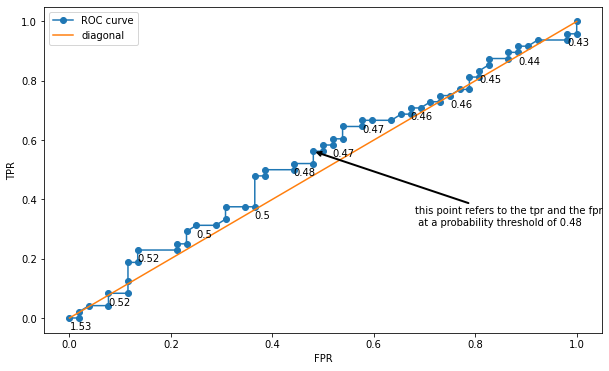

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

x = np.random.randint(40, 400, 100).reshape(-1, 1)
y = np.random.randint(0, 2, 100)

model = LogisticRegression()
model.fit(x, y)
probs = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, probs[:,1])

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)),
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## After plotting ROC-Curve - how the threshold relates back to the values of the variable (x) for identification of the cut off.

Simple ans is we can not.

X was our input matrix on which we performed the prediction. The thresholds are only related to the prediction from the classifier ("probabilities" values).


## Next Task - Computing the best threshold

Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric A for the given data 5_c.csv

you will be predicting label of a data points like this:

$y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

Note 1: in this data you can see number of negative points > number of positive points

In [ ]:
# df_5_c = pd.read_csv('../Instructions-AML/5_c.csv')
df_5_c = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_c.csv')
print('df_5_c.shape ', df_5_c.shape)
df_5_c.head()

df_5_c.shape  (2852, 2)


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [ ]:
actual_y_train_arr_5_c = df_5_c.iloc[:, 0].values
print('actual_y_train_arr_5_c ', actual_y_train_arr_5_c)

y_proba_5_c = df_5_c.iloc[:, 1].values
print('y_proba_5_c ', y_proba_5_c)

unique_probability_thresholds_5_c = np.unique(df_5_c['prob'])


actual_y_train_arr_5_c  [0 0 0 ... 1 1 1]
y_proba_5_c  [0.45852068 0.50503693 0.41865174 ... 0.65916054 0.45626546 0.65916054]


In [ ]:
# First I will modify the above get_tpr_fpr() function to return the value of A

def get_A_metric(y_actual, y_probabilities, threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    min_a = float('inf')

    for i in range(len(y_probabilities)):
        if y_probabilities[i] >= threshold :
            if y_actual[i] == 1:
                tp += 1
            else:
                fp += 1

        if y_probabilities[i] < threshold:
            if y_actual[i] == 0:
                tn += 1
            else:
                fn += 1

    A = (500 * fn) + (100 * fp)

    return A


In [ ]:
# Now a function to traverse the entire unique probability thresholds array
# and return the minimum value of A and also the corresponding threshold

def get_minimized_a(y_actual, y_probabilities, total_threshold_arr ):
  min_a = float('inf')
  min_t = 0

  for threshold in total_threshold_arr:
    a = get_A_metric(y_actual, y_probabilities, threshold)
    if a <= min_a:
        min_a = min(a, min_a)
        min_t = threshold

  return min_a, min_t

In [ ]:
print(get_minimized_a(actual_y_train_arr_5_c, y_proba_5_c, unique_probability_thresholds_5_c ))
# (141000, 0.2300390278970873)

(141000, 0.2300390278970873)


So that thats the minimum value of **A** which is 141000

and the corresponding threshold is 0.2300390278970873


---


## D. Compute performance metrics(for regression) for the given data 5_d.csv

Note 1: 5_d.csv will having two columns Y and predicted_Y both are real valued features

Compute Mean Square Error

Compute MAPE:

Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

---

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


# df_5_d = pd.read_csv('../Instructions-AML/5_d.csv')
df_5_d = pd.read_csv('https://raw.githubusercontent.com/rohan-paul/Multiple-Dataset/main/5-Performance-metrics-without-Sklearn/5_d.csv')
df_5_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [ ]:
# print(df_5_d.to_numpy())
actual_y_train_arr_5d = df_5_d.iloc[:, 0].values
print('actual_y_train_arr_5d ', actual_y_train_arr_5d)
predicted_y_arr_5d = df_5_d.iloc[:, 1].values
print('predicted_y_arr_5d ', predicted_y_arr_5d)

actual_y_train_arr_5d  [101. 120. 131. ... 106. 105.  81.]
predicted_y_arr_5d  [100. 100. 113. ...  93. 101. 104.]


Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

Assume R2 = 0.68
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

R² is calculated by taking one minus the sum of squares of residuals divided by the total sum of squares.

![Imgur](https://imgur.com/X0zWQho.png)

In [ ]:
# Checking the r-square metric with sklearn
sklearn_r2 = r2_score(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_r2

0.9563582786990937

In [ ]:
def calculate_r2_score(y_train, y_predicted):
    y_train_bar = y_train.mean()
    # y_train_bar = np.mean(y_train)

    sum_squared_residual = ((y_train - y_predicted)**2).sum()
    sum_squared_total = ((y_train - y_train_bar)**2).sum()

    return 1 - (sum_squared_residual/sum_squared_total)

print(calculate_r2_score(actual_y_train_arr_5d, predicted_y_arr_5d))


0.9563582786990937


So the r-square measures matches between my custom function and sklearn's inbuilt funcion

---

## Mean Squared Error (MSE) / Mean Squared Deviation (MSD)

The Mean Squared Error measures the average of the errors squared. It basically calculates the difference between the estimated and the actual value, squares these results and then computes their average.

Because the errors are squared, MSE can only assume non-negative values. Due to the intrinsic randomness and noise associated with most processes, MSE is usually positive and not zero.

![Imgur](https://imgur.com/GWH0ap5.png)

In [ ]:
def calculate_mse(y_actual, y_predicted):
    mse = np.mean((y_actual - y_predicted)**2)
    return mse

print(calculate_mse(actual_y_train_arr_5d, predicted_y_arr_5d))


177.16569974554707


In [ ]:
# Checking the Mean Square Error metric with sklearn
from sklearn.metrics import mean_squared_error

sklearn_mse = mean_squared_error(actual_y_train_arr_5d, predicted_y_arr_5d)
sklearn_mse

177.16569974554707

So the Mean Squared Error measures matches between my custom function and sklearn's inbuilt funcion

---

## Mean Absolute Percentage Error (MAPE)

The Mean Absolute Percentage Error measures the error between actual and forecasted values as a percentage. It achieves so by calculating it similarly to MAE, but also dividing it by the actual value, expressing the result as a percentage.

By expressing the error as a percentage, we can have a better understanding of how off our predictions are in relative terms. For instance, if we were to predict next year’s spending, an MAE error of $50 could be both a relatively good or bad approximation.

![Imgur](https://imgur.com/zCFJTE6.png)


In [ ]:
# The below will return the % value i.e 12.9 means 12.9%
def calculate_mean_absolute_percentage_error(y_actual, y_predicted):
    mape = np.mean((np.abs(y_actual - y_predicted)) / np.mean(y_actual)) * 100
    return mape

print(calculate_mean_absolute_percentage_error(actual_y_train_arr_5d, predicted_y_arr_5d))

12.912029940096867


### When one of the actual data-point is zero

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

Problems can occur when calculating the MAPE value with a series of small denominators. A singularity problem of the form 'one divided by zero' and/or the creation of very large changes in the Absolute Percentage Error, caused by a small deviation in error, can occur.

As an alternative, each actual value (At) of the series in the original formula can be replaced by the average of all actual values (Āt) of that series. This alternative is still being used for measuring the performance of models that forecast spot electricity prices.[2]

Note that this is equivalent to dividing the sum of absolute differences by the sum of actual values, and is sometimes referred to as WAPE (weighted absolute percentage error).

So in that case the formulate becomes

![Imgur](https://imgur.com/KTg47Gk.png)

The derivation is as follows.

![Imgur](https://imgur.com/Lm45BRD.png)

Basically,

```python

mean(actual_value) = sum(actual_value) / n

hence n * mean(actual_value = sum(a)

```


In [ ]:
def calculate_mean_absolute_percentage_error_2(y_actual, y_predicted):
    mape = ((np.sum(np.abs(y_actual - y_predicted))) / np.sum(y_actual)) * 100
    return mape

print(calculate_mean_absolute_percentage_error_2(actual_y_train_arr_5d, predicted_y_arr_5d))

12.91202994009687
